In [11]:
import os
import sys

module_path = os.path.abspath(os.path.join('../..'))
if module_path not in sys.path:
    sys.path.append(module_path)
    
%load_ext autoreload
%autoreload 2
%matplotlib inline

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [12]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

import torch

torch.set_printoptions(linewidth=999, precision=4, sci_mode=False)

from Net.experiments.main_experiment import TE
from Net.experiments.base.default_experiment import HOMO12, HOMO21, KP1, KP2, W_KP1, W_KP2, WV_KP1_MASK, WV_KP2_MASK, KP1_DESC, KP2_DESC, DESC1, DESC2
from Net.source.utils.common_utils import draw_cv_keypoints, torch2cv, plot_figures
from Net.source.utils.model_utils import sample_descriptors
from Net.source.utils.math_utils import calculate_inv_similarity_matrix, calculate_distance_matrix, calculate_inv_similarity_vector
from Net.source.utils.image_utils import create_coordinates_grid, create_desc_coordinates_grid, warp_points
from Net.source.hpatches_dataset import S_IMAGE1, S_IMAGE2, HOMO12, HOMO21


In [13]:
device = torch.device('cpu')

checkpoint_dir = "/home/konstantin/PycharmProjects/Summertime/Net/checkpoints/net"

experiment = TE(device, None, checkpoint_dir, 1000)

In [14]:
batch = experiment.analyze_inference()

In [16]:
cv_s_image1 = torch2cv(batch[S_IMAGE1].squeeze(0))
cv_s_image2 = torch2cv(batch[S_IMAGE2].squeeze(0))

kp1 = batch[KP1]
kp2 = batch[KP2]

w_kp1 = batch[W_KP1]
w_kp2 = batch[W_KP2]

wv_kp1_mask = batch[WV_KP1_MASK]
wv_kp2_mask = batch[WV_KP2_MASK]

kp1_desc = batch[KP1_DESC]
kp2_desc = batch[KP2_DESC]

desc1 = batch[DESC1]
desc2 = batch[DESC2]

homo12 = batch[HOMO12]
homo21 = batch[HOMO21]

In [34]:
from Net.source.utils.eval_utils import *

print(repeatability_and_nearest_neighbor_match_score(kp1, w_kp2, kp2, wv_kp2_mask, kp1_desc, kp2_desc, 5))
print(repeatability_score(kp1, w_kp2, kp2, wv_kp2_mask, 5))
print(nearest_neighbor_threshold_and_ratio_match_score(kp1, w_kp2, kp2, wv_kp2_mask, kp1_desc, kp2_desc, 5, 1, 0.7))

[tensor(0.7619), tensor(0.6944)]
tensor(0.7619)
[tensor(0.6905), tensor(0.4365)]


In [177]:
cell_id = 903
cell_ids = [cell_id, cell_id - w - 1, cell_id - w + 1, cell_id + w - 1, cell_id + w + 1]

anchor_kp = coo_grid[0, cell_ids]
selected_cells = kp1[0, mask[0, cell_id].nonzero()].squeeze(1)

In [178]:
cv_kp1_image = draw_cv_keypoints(cv_s_image1, kp1.squeeze(0), (0, 255, 0))


res1 = draw_cv_keypoints(cv_kp1_image, anchor_kp, (255, 0, 0))
res1 = draw_cv_keypoints(res1, selected_cells, (0, 0, 255))

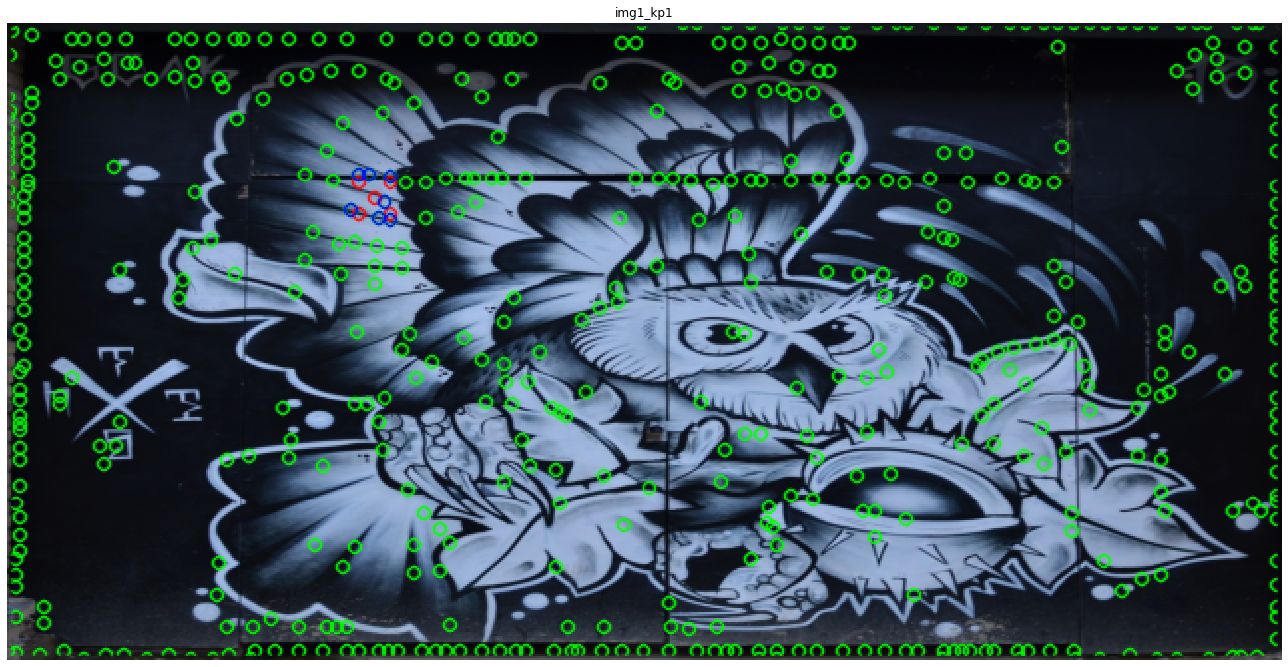

In [179]:
plot_figures({'img1_kp1': res1}, 1, 1, (18, 18))